In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('cleaned_Big_Table.csv')
#data['Rk'] = data['Rk'].apply(lambda x: x * 100)

train_df = data[data['Rk'].notna()]
test_df = data[data['Rk'].isna()]
(train_df.shape,test_df.shape)

((1241, 87), (320, 87))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np


# DROP unrealted column
train_df = train_df.drop(['Squad', 'League', 'Season', 'Unnamed: 1_level_0 # Pl_x', 'Unnamed: 2_level_0 90s_x'], axis=1)
train_df = train_df.select_dtypes(include=[np.number])  # Only keep numeric columns
target = 'Rk'
# Calculate correlations with the target column
correlations =train_df.corr()[target]

# Filter out weak correlations
significant_features = correlations[abs(correlations) > 0.5].index.tolist()
significant_features.remove(target)
significant_features

['Standard Gls',
 'Standard Sh/90',
 'Standard SoT/90',
 'Standard G/Sh',
 'Unnamed: 2_level_0 Poss',
 'SCA SCA90',
 'GCA GCA',
 'GCA GCA90',
 'GCA Types PassLive']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping



#train_df = train_df.drop(['Squad', 'Rk', 'League', 'Season', 'Unnamed: 1_level_0 # Pl_x', 'Unnamed: 2_level_0 90s_x'], axis=1)
X = train_df[significant_features]
y = train_df['Rk']

#  standardized
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# devide into train and test set
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=50)

# create the model
model = Sequential([
    Dense(64, input_dim=len(significant_features), activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')  # 输出层使用线性激活函数
])

# compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


# training
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    #callbacks=[early_stopping]
)



Epoch 1/20


F:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 137.6768 - val_loss: 131.5925
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 132.5126 - val_loss: 118.8703
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 122.4290 - val_loss: 98.9685
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 95.2008 - val_loss: 70.3794
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62.0265 - val_loss: 44.7162
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.8438 - val_loss: 38.6434
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.4819 - val_loss: 33.8749
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.1365 - val_loss: 29.1058
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.6725 - val_loss: 25.8707
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.4398 - val_loss: 23.6192
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.2953 - val_loss: 22.0545
Epoch 12/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss

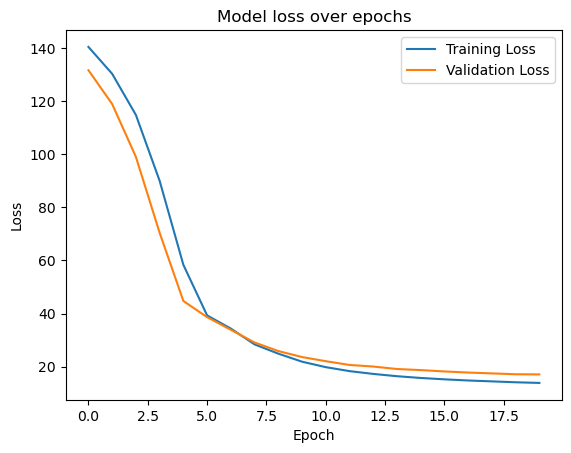

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


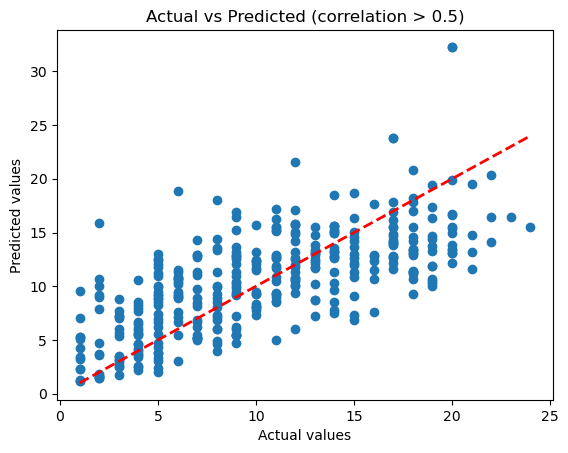

MSE: 17.07913656438931
RMSE: 4.132691201189524
R2 Score: 0.4689051819633361


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


# loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# a scatter plot of predicted values versus actual values
predictions = model.predict(X_val)
plt.scatter(y_val, predictions)
plt.title('Actual vs Predicted (correlation > 0.5)')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', linewidth=2)
plt.show()

# Calculate and output performance metrics
mse = mean_squared_error(y_val, predictions)
rmse = mse ** 0.5
r2 = r2_score(y_val, predictions)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

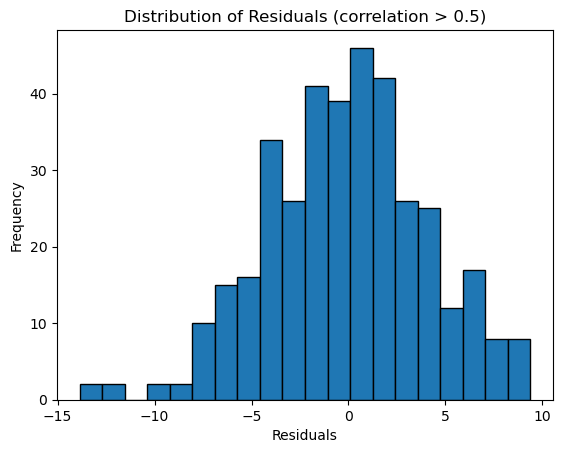

In [ ]:
import numpy as np

# residuals
residuals = y_val - predictions.flatten()

# Plot a histogram of the error
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (correlation > 0.5)')
plt.show()